# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle
import cv2
import numpy as np
import random

training_file = "./traffic-sign-data/train.p"
testing_file = "./traffic-sign-data/test.p"
validation_file = "./traffic-sign-data/valid.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

def blur(image):
    return cv2.blur(image,(3,3))

def gaussian_blur(image):
    return cv2.GaussianBlur(image, (3, 3), 0)
    
def translate(image):
    rows, cols, _ = image.shape
    rand_x = random.randint(3,6)
    rand_y = random.randint(3,6)
    if random.randint(0,10) < 5:
        rand_x = -1*rand_x
    if random.randint(0,10) < 5:
        rand_y = -1*rand_y
    M = np.float32([[1,0, rand_x],[0,1,rand_y]])
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def brighten_image(image):
    pass

def generate_transformed_images(image):
    return blur(image), translate(image), gaussian_blur(image)

X_train_original, y_train_original = X_train.copy(), y_train.copy()

In [2]:
signnames = {}

import csv
with open('signnames.csv', 'r') as signnames_csv:
    signnames = csv.DictReader(signnames_csv)
    signnames = {int(item['ClassId']): item['SignName'] for item in signnames}
    
nr_of_training_imgs = {signnames[label]: list(train['labels']).count(label) for label in range(0,43)}

for key, value in nr_of_training_imgs.items():
    print(key, value)


Speed limit (20km/h) 180
Speed limit (30km/h) 1980
Speed limit (50km/h) 2010
Speed limit (60km/h) 1260
Speed limit (70km/h) 1770
Speed limit (80km/h) 1650
End of speed limit (80km/h) 360
Speed limit (100km/h) 1290
Speed limit (120km/h) 1260
No passing 1320
No passing for vehicles over 3.5 metric tons 1800
Right-of-way at the next intersection 1170
Priority road 1890
Yield 1920
Stop 690
No vehicles 540
Vehicles over 3.5 metric tons prohibited 360
No entry 990
General caution 1080
Dangerous curve to the left 180
Dangerous curve to the right 300
Double curve 270
Bumpy road 330
Slippery road 450
Road narrows on the right 240
Road work 1350
Traffic signals 540
Pedestrians 210
Children crossing 480
Bicycles crossing 240
Beware of ice/snow 390
Wild animals crossing 690
End of all speed and passing limits 210
Turn right ahead 599
Turn left ahead 360
Ahead only 1080
Go straight or right 330
Go straight or left 180
Keep right 1860
Keep left 270
Roundabout mandatory 300
End of no passing 210
End 

In [3]:
print(len(y_train))
print(len(X_train))

34799
34799


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Some example images from the dataset

In [8]:
import matplotlib.pyplot as plt

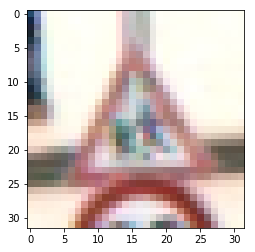

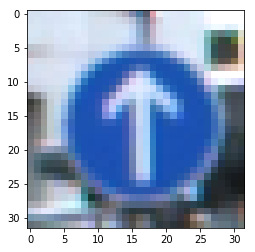

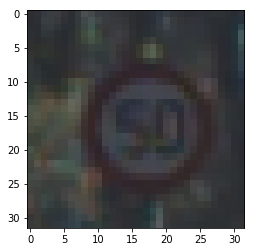

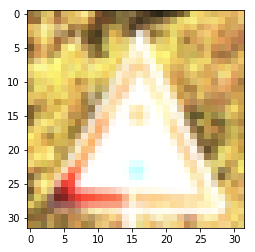

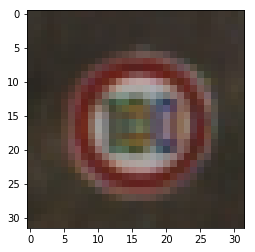

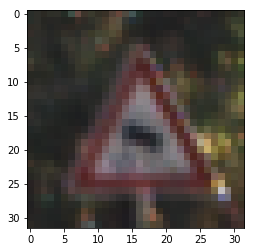

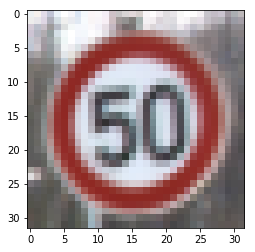

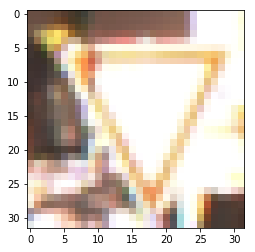

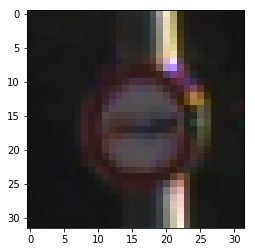

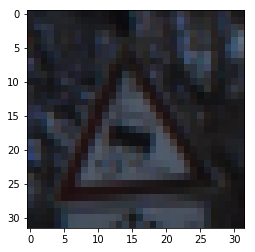

In [9]:
random_iterable = (random.randint(0, len(X_train)) for _ in range(10))
iterable = (list(random_iterable))

for random_num in iterable:
    image = X_train[random_num]
    plt.imshow(image)
    plt.show()

    
%matplotlib inline

### Histogram of the initial dataset

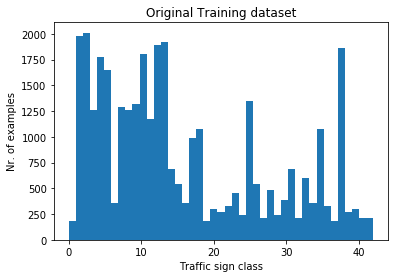

In [10]:
plt.hist(y_train_original, bins=43)
plt.title("Original Training dataset")
plt.xlabel("Traffic sign class")
plt.ylabel("Nr. of examples")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Augmenting the initial dataset

I decided to augment the initial dataset by adding some transformed images to it. This included:
- **translation**: randomly translate an image by a few pixels, so it is shifted from its original center. Two examples are shown a few cells below.
- **blurring** and **Gaussian blurring** are also used.

I extended the dataset in a way that all classes have at least 1000 examples.

#### The following cell shows how the image dataset was augmented

In [4]:
def add_generated_images(X_train, y_train, image, label, generated_images_per_image=3):
    for i in range(generated_images_per_image):
        blurred, translated, gauss_blurred = generate_transformed_images(image)

        X_train = np.concatenate((X_train, [blurred, translated, gauss_blurred]), axis=0)
        y_train = np.concatenate((y_train, [label, label, label]), axis=0)

    return X_train, y_train
                        

def extend_training_set(X_train, y_train, min_example_count=200, generated_images_per_image=3):
    labels, counts = np.unique(y_train, return_counts=True)
    training_images_per_label = dict(zip(labels, counts))

    print('Adding transformed images to the training dataset')
    
    count = 0
    for image, label in zip(X_train, y_train):
        count += 1
        if count % 10 == 0:
            print('.', end='')
        if count % 1000 == 0:
            print(count)
        if training_images_per_label[label] > min_example_count:
            chance = random.randint(0,100)
            if chance > 1:
                continue
        X_train, y_train = add_generated_images(X_train, y_train, image, label, generated_images_per_image)


        labels, counts = np.unique(y_train, return_counts=True)
        training_images_per_label = dict(zip(labels, counts))
    
    print('Done')
    return X_train, y_train


# X_train, y_train = extend_training_set(X_train, y_train, min_example_count=300, generated_images_per_image=2)


pickle.dump( {'features': X_train, 'labels': y_train}, open( "my_pick_dump.p", "wb" ) )


In [12]:
data = pickle.load( open( "extended_to_1000.p", "rb" ) )
X_train = data['features']
y_train = data['labels']

print(len(y_train))
print(len(X_train))

67529
67529


### Histogram of the extended dataset

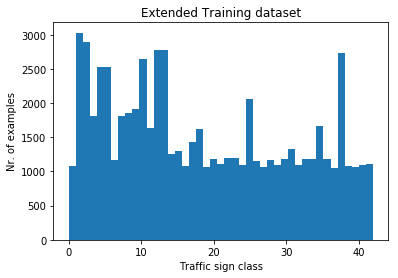

In [13]:
plt.hist(y_train, bins=43)
plt.title("Extended Training dataset")
plt.xlabel("Traffic sign class")
plt.ylabel("Nr. of examples")
plt.show()

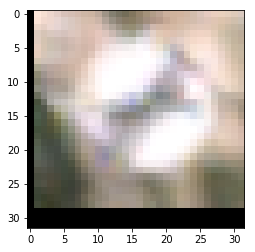

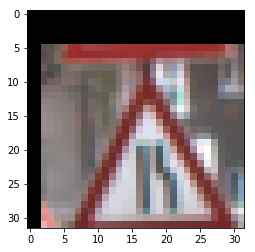

In [47]:
import matplotlib.pyplot as plt

random_iterable = (random.randint(0, len(X_train)) for _ in range(2))
iterable = (list(random_iterable))

for random_num in iterable:
    image = X_train[random_num]
    plt.imshow(image)
    plt.show()

    
%matplotlib inline

### Grayscaling, normalizing, shuffling and splitting the dataset

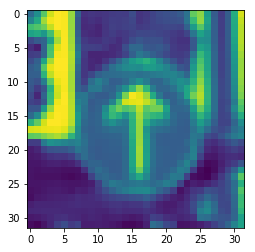

Means before normalization
-1.00261095458
82.1484603612
Means after normalization - approximately normalized
-1.00261095459
-0.358215153428


In [30]:
import numpy as np

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

# Grayscale
X_train_grayscale = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grayscale = np.sum(X_test/3, axis=3, keepdims=True)

# Normalize
X_train_normalized = (X_train_grayscale - 128)/128
X_test_normalized = (X_test_grayscale - 128)/128

# Shuffle
X_train, y_train = shuffle(X_train_normalized, y_train)

# Split training and validation datasets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)


print("Means before normalization")
print(np.mean(X_train))
print(np.mean(X_test))

print("Means after normalization - approximately normalized")
print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

### Model Architecture

I started with the original LeNet architecture to see how well it performs.
It did not disappoint: after some tweaking (playing around with batch size, learning rate and number of epochs), it plateaud around .965 accuracy on the validation set.

The layers are described in the comments as well: they are only slightly modified compared to the architecture we learned during the class. Only the dimensions and sizes of the layers are modified.
In brief, it uses the following layers:

- Convolutional. Input = 32x32x1. Output = 28x28x6
- Activation layer with a RELU function
- Max pooling layer, Input = 28x28x6. Output = 14x14x6
- Convolutional. Output = 10x10x16.
- Activation layer with a RELU function
- Max pooling layer, Input = 10x10x16. Output = 5x5x16.
- Flatten layer, Input = 5x5x16. Output = 400.
- Fully Connected layer, Input = 400. Output = 120
- Activation layer with a RELU function
- Fully Connected. Input = 120. Output = 84.
- Activation layer with a RELU function
- Finally, a fully connected. Input = 84. Output = 43 for the 43 labels.

In [17]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 100

In [18]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print(logits.shape)
    return logits

### Train, Validate and Test the Model

- AdamOptimizer was used, 
- a learning rate of 0.0009 turned out to a be a good value, and 
- I used 40 epochs, with 
- a batch size of 100

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder for a batch of input images
y = tf.placeholder(tf.int32, (None)) # placeholder for a batch of output labels

one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

# Training pipeline
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Training the model

(?, 43)


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.792

EPOCH 2 ...
Validation Accuracy = 0.867

EPOCH 3 ...
Validation Accuracy = 0.903

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.940

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Accuracy = 0.952

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.960

EPOCH 17 ...
Validation Accuracy = 0.956

EPOCH 18 ...
Validation Accuracy = 0.957

EPOCH 19 ...
Validation Accuracy = 0.958

EPOCH 20 ...
Validation Accuracy = 0.955

EPOCH 21 ...
Validation Accuracy = 0.955

EPOCH 22 ...
Validation Accuracy = 0.955

EPOCH 23 ...
Validation Accuracy = 0.959

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [20]:
import os 
from PIL import Image
import cv2
filenames = os.listdir('custom_images')
print(filenames)
import matplotlib.pyplot as plt

import numpy as np
images = []

for filename in filenames:
    image = cv2.imread(os.path.join('custom_images', filename))
    images.append(image)    
    
images = np.asarray(images)
grayscale_images = np.sum(images/3, axis=3, keepdims=True)
normalized_images = (grayscale_images - 128)/128 

['38_keepright.jpg', '14_stop.jpg', '13_yield.png', '18_slope.JPG', '2_50limit.jpg', '25_roadworks.jpeg', '17_noentry.jpg', '23_slippery.jpg', '1_30limit.png']


### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

BATCH_SIZE = 100
# my_labels = [17, 18, 13, 25, 31, 14, 22, 31, 23, 1]
my_labels = [38, 14, 13, 18, 2, 25, 17, 23 , 1]

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet_1.meta')
    saver3.restore(sess, "./lenet_1")
    my_accuracy = evaluate(normalized_images, my_labels)
    print("Test Set Accuracy on the downloaded images = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Test Set Accuracy on the downloaded images = 0.778


In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet_1.meta')
    saver3.restore(sess, "./lenet_1")
    my_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Test Set Accuracy = 0.899


In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet_1.meta')
    saver3.restore(sess, "./lenet_1")
    my_accuracy = evaluate(X_validation, y_validation)
    print("Validation Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Test Set Accuracy = 0.995


### Analyze Performance

7 out of the 9 images were classified correctly, thus the performance on the downloaded images was 77.8%. 
The images were cut out in a similar fashion to the training images, with the traffic sign at around the center.
One image, representing a 20% slope caution sign, was not part of the training dataset, so it is expected that it's not recognized.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet_1
TopKV2(values=array([[  1.00000000e+00,   1.85656843e-20,   1.78306907e-20,
          6.09276783e-22,   3.70710170e-28],
       [  9.98943150e-01,   1.05686102e-03,   3.04377702e-19,
          7.86749979e-21,   6.19810380e-25],
       [  1.00000000e+00,   1.10654023e-15,   2.84433432e-17,
          1.73675028e-18,   1.46082309e-18],
       [  1.00000000e+00,   3.76812600e-12,   3.13648915e-16,
          9.01054465e-21,   3.96238860e-21],
       [  9.99999762e-01,   2.72983726e-07,   3.86203500e-11,
          2.55116952e-11,   5.09163024e-14],
       [  1.00000000e+00,   5.03614661e-09,   2.05094644e-12,
          7.86462692e-13,   6.76174712e-23],
       [  1.00000000e+00,   1.84148534e-23,   1.21047069e-23,
          1.84101016e-28,   5.78062795e-31],
       [  9.53025341e-01,   2.78714485e-02,   1.63501427e-02,
          2.72562006e-03,   1.65077345e-05],
       [  9.99999523e-01,   4.49873966e-07,   3.45631390e-09,
          5.3916

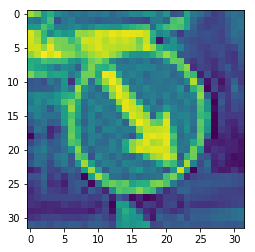

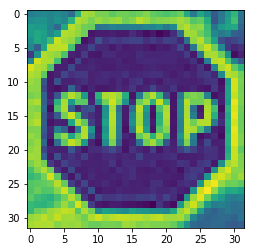

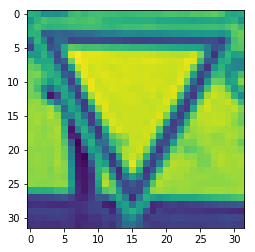

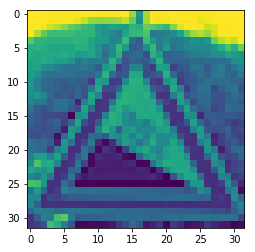

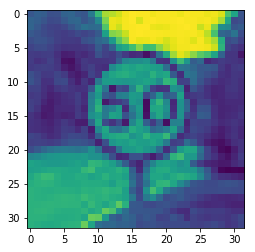

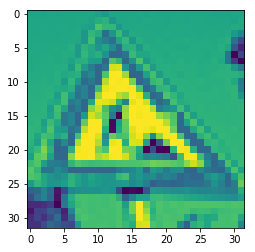

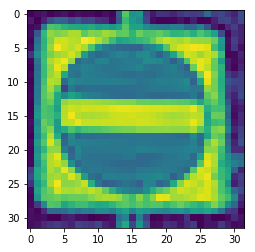

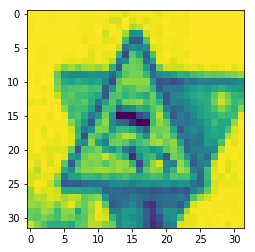

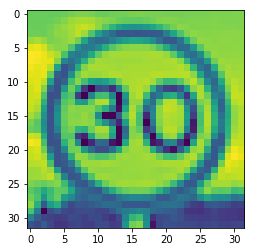

In [32]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_1.meta')
    saver.restore(sess, "./lenet_1")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: normalized_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: normalized_images, keep_prob: 1.0})

    print(my_top_k)
    for i, image in enumerate(normalized_images):
        plt.imshow(image.squeeze())
        plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")